# Knapsack Problem



- 도둑이 30kg 까지 담을수 있는 배낭을 메고 곡식창고에 침투햇다.

- 창고 입구에는 보관중인 곡식의 전체 수량과 1kg당 가격이 적혀 있다. 

- 도둑의 목적은 이익이 최대가 되도록 배낭을 채우는 것이다.


## Fractional Knapsack Problem : Greedy Algorithm



Greedy Solution = Optimal Solution


아이템의 분할이 가능할 경우 Greedy Algorithm 으로 구한 해가 최적의 해를 만족 합니다. 


- Greedy Algorithm : 가장 값어치가 높은 아이템 부터 먼저 채우는것

- 1kg당 가격을 기준으로 내림차순으로 정렬

- 배낭의 무게(=30kg)를 초과하지 않을 때까지 비싼 순으로 채우기

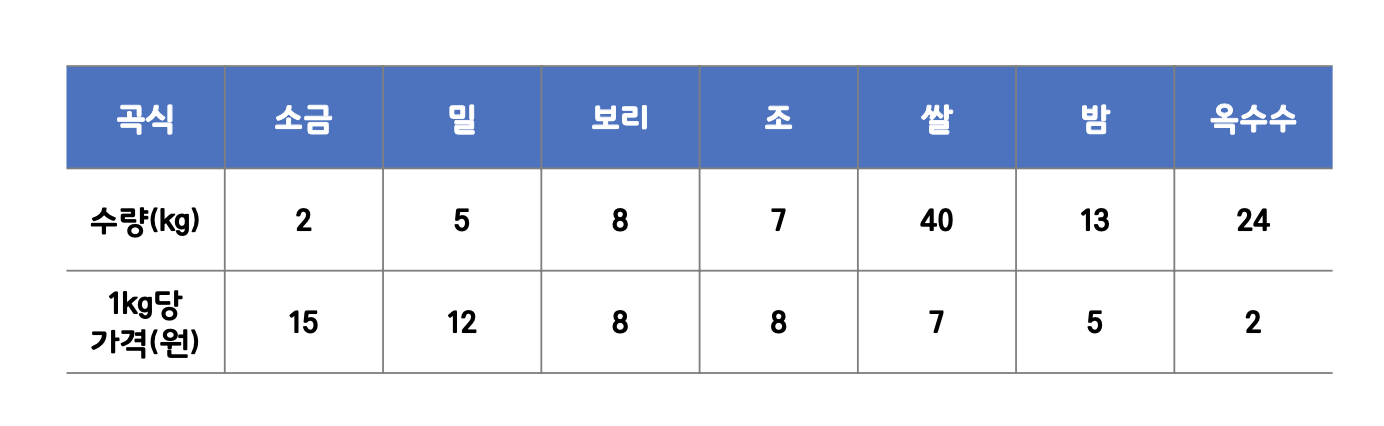

In [29]:
def Fractional_knapsack(W, w, p): 
    
    n = len(w)
    
    K = [0] * (n)
    
    weight = 0
    
    for i in range(n):
        
        weight += w[i] 
        K[i] = w[i]
        
        if (weight > W):
            
            K[i] = K[i] - (weight - W)
            
            break; 
        
    return K

In [30]:
W = 30



w = [2, 5, 8, 7, 40, 13, 24] 
p = [15, 12, 8, 8, 7, 5, 2] 



K = Fractional_knapsack(W, w, p)

print(K, sum(K))

total_price = 0

for i in range(len(K)):
    total_price += p[i] * K[i] 
    
    
print("Total price is", total_price)

[2, 5, 8, 7, 8, 0, 0] 30
Total price is 266


In [31]:
K

[2, 5, 8, 7, 8, 0, 0]

```
        if (weight > W):
            
            K[i] = K[i] - (weight - W)
            
            break`

```

---

만약 분할이 불가하다면 Greedy Algorithm으로 구한 Greedy solution은 Optimal solution을 보장하지 않습니다.

따라서


- 동적 계획법

- Back Tracking

- 분기 한정법

으로 해결 해야 합니다.


## Dynamic_knapsack

In [33]:
def Dynamic_knapsack(i, W, w, p): 
    
    if (i <= 0 or W <= 0):
        return 0
    
    if (w[i] > W):
        return Dynamic_knapsack(i - 1, W, w, p) 
    
    else: # w[i] <= W
        left = Dynamic_knapsack(i - 1, W, w, p)
        right = Dynamic_knapsack(i - 1, W - w[i], w, p) 
        return max(left, p[i] + right)

In [34]:
W = 30

w = [0, 5, 10, 20]
p = [0, 10, 6, 7]

profit = Dynamic_knapsack(len(w)-1, W, w, p) 

print(profit)

17


In [35]:
w = [0, 2, 5, 8, 7, 40, 13, 24] 
p = [0, 15, 12, 8, 8, 7, 5, 2]

In [36]:
profit = Dynamic_knapsack(len(w)-1, W, w, p) 
print(profit)


43


---

## Backtracking_knapsack

In [38]:
def Backtracking_knapsack (i, profit, weight):
    
    global maxprofit, numbest, bestset
    
    if (weight <= W and profit > maxprofit):
        maxprofit = profit
        numbest = i
        bestset = include[:]
    
    if (promising(i, profit, weight)):
        include[i + 1] = True
        Backtracking_knapsack(i + 1, profit + p[i+1], weight + w[i+1])
        include[i + 1] = False
        Backtracking_knapsack(i + 1, profit, weight)

def promising (i, profit, weight):
    if (weight > W):
        return False
    else:
        j = i + 1
        bound = profit
        totweight = weight
        while (j <= n and totweight + w[j] <= W):
            totweight += w[j]
            bound += p[j]
            j += 1
        k = j
        if (k <= n):
            bound += (W - totweight) * p[k] / w[k]
        return bound > maxprofit

n = 4
W = 16
w = [0, 2, 5, 10, 5]
p = [0, 40, 30, 50, 10]
maxprofit = 0
numbest = 0
bestset = []
include = [False] * (n + 1)

Backtracking_knapsack(0, 0, 0)
print(bestset[1:len(bestset)])

[True, False, True, False]


---

## Branch-and-Bound Knapsack

In [40]:
from queue import PriorityQueue

class SSTNode:
    
    def __init__ (self, level, profit, weight):
        self.level = level
        self.profit = profit
        self.weight = weight
        self.bound = 0
        
    def print(self):
        print(self.level, self.profit, self.weight, self.bound);
        
def bound(u, p, w):
    n = len(p) - 1
    
    if (u.weight >= W):
        return 0
    
    else:
        result = u.profit
        j = u.level + 1
        totweight = u.weight
        
        while (j <= n and totweight + w[j] <= W):
            totweight += w[j]
            result += p[j]
            j += 1
        
        k = j
        
        if (k <= n):
            result += (W - totweight) * p[k] / w[k]
        return result

def BAB_knapsack (p, w, W):
    
    PQ = PriorityQueue()
    v = SSTNode(0, 0, 0)
    maxprofit = 0
    v.bound = bound(v, p, w)
    PQ.put((-v.bound, v))
    
    while (not PQ.empty()):
        v = PQ.get()[1]
        print("POP:", end="")
        v.print()
        
        
        if (v.bound > maxprofit):
            level = v.level + 1
            weight = v.weight + w[level]
            profit = v.profit + p[level]
            u = SSTNode(level, profit, weight)
            
            if (u.weight <= W and u.profit > maxprofit):
                maxprofit = u.profit
            u.bound = bound(u, p, w)
            print("\tPUT:", end="")
            u.print()
            
            
            if (u.bound > maxprofit):
                PQ.put((-u.bound, u))
                print("\t\tYES")
            u = SSTNode(level, v.profit, v.weight)
            u.bound = bound(u, p, w)
            print("\tPUT:", end="")
            u.print()
            
            
            if (u.bound > maxprofit):
                PQ.put((-u.bound, u))
                print("\t\tYES")
                
    return maxprofit

profit = [0, 40, 30, 50, 10]
weight = [0, 2, 5, 10, 5]
W = 16

maxprofit = BAB_knapsack(profit, weight, W)
print('maxprofit =', maxprofit)


POP:0 0 0 115.0
	PUT:1 40 2 115.0
		YES
	PUT:1 0 0 82.0
		YES
POP:1 40 2 115.0
	PUT:2 70 7 115.0
		YES
	PUT:2 40 2 98.0
		YES
POP:2 70 7 115.0
	PUT:3 120 17 0
	PUT:3 70 7 80
		YES
POP:2 40 2 98.0
	PUT:3 90 12 98.0
		YES
	PUT:3 40 2 50
POP:3 90 12 98.0
	PUT:4 100 17 0
	PUT:4 90 12 90
POP:1 0 0 82.0
POP:3 70 7 80
maxprofit = 90
